In [167]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
start = datetime(2022, 1, 1)
end = datetime(2023, 12, 12)

In [169]:
data = Daily('10637', start, end)
data = data.fetch()

In [170]:
df = pd.DataFrame(data)
df.to_csv("2022data.csv")
print(data)


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
time                                                                      
2022-01-01   9.7   3.8  12.0   0.0   0.0  192.0   8.6  26.6  1027.1    0.0
2022-01-02   8.1   3.2  12.0   5.1   0.0  221.0  15.8  62.3  1019.3   96.0
2022-01-03   9.8   7.7  12.1  13.6   0.0  230.0  22.3  47.9  1014.3    9.0
2022-01-04   7.4   5.8   9.9  19.3   0.0  209.0  16.2  51.5  1000.4    0.0
2022-01-05   3.9   1.8   6.1   0.0   0.0  241.0  23.4  54.4  1008.4  126.0
...          ...   ...   ...   ...   ...    ...   ...   ...     ...    ...
2023-02-20   3.8   0.3   7.7   NaN   NaN  136.0   8.7  24.1  1029.9    NaN
2023-02-21   4.2   0.8   7.6   NaN   NaN  172.0   9.5  22.2  1027.7    NaN
2023-02-22   5.3   2.9   8.4   NaN   NaN  202.0  11.0  27.8  1023.5    NaN
2023-02-23   5.0   3.5   7.3   NaN   NaN  236.0  12.6  29.6  1020.6    NaN
2023-02-24   4.3   2.4   6.9   NaN   NaN  252.0  11.8  27.8  1018.3    NaN

[420 rows x 10 columns]


In [171]:
weather=df[["tmax","tmin","tavg","prcp","wdir","wspd","pres"]]
weather

,tmax,tmin,tavg,prcp,wdir,wspd,pres
time,,,,,,,
2022-01-01,12.0,3.8,9.7,0.0,192.0,8.6,1027.1
2022-01-02,12.0,3.2,8.1,5.1,221.0,15.8,1019.3
2022-01-03,12.1,7.7,9.8,13.6,230.0,22.3,1014.3
2022-01-04,9.9,5.8,7.4,19.3,209.0,16.2,1000.4
2022-01-05,6.1,1.8,3.9,0.0,241.0,23.4,1008.4
...,...,...,...,...,...,...,...
2023-02-20,7.7,0.3,3.8,NaN,136.0,8.7,1029.9
2023-02-21,7.6,0.8,4.2,NaN,172.0,9.5,1027.7
2023-02-22,8.4,2.9,5.3,NaN,202.0,11.0,1023.5


In [172]:
weather = weather.rename_axis('date').reset_index()
print(weather)

          date  tmax  tmin  tavg  prcp   wdir  wspd    pres
0   2022-01-01  12.0   3.8   9.7   0.0  192.0   8.6  1027.1
1   2022-01-02  12.0   3.2   8.1   5.1  221.0  15.8  1019.3
2   2022-01-03  12.1   7.7   9.8  13.6  230.0  22.3  1014.3
3   2022-01-04   9.9   5.8   7.4  19.3  209.0  16.2  1000.4
4   2022-01-05   6.1   1.8   3.9   0.0  241.0  23.4  1008.4
..         ...   ...   ...   ...   ...    ...   ...     ...
415 2023-02-20   7.7   0.3   3.8   NaN  136.0   8.7  1029.9
416 2023-02-21   7.6   0.8   4.2   NaN  172.0   9.5  1027.7
417 2023-02-22   8.4   2.9   5.3   NaN  202.0  11.0  1023.5
418 2023-02-23   7.3   3.5   5.0   NaN  236.0  12.6  1020.6
419 2023-02-24   6.9   2.4   4.3   NaN  252.0  11.8  1018.3

[420 rows x 8 columns]


In [173]:
weather['date']=pd.to_datetime(weather['date'],format='%y-%m-%d')
weather['year']=weather['date'].dt.year
weather['month']=weather['date'].dt.month
weather

,date,tmax,tmin,tavg,prcp,wdir,wspd,pres,year,month
0,2022-01-01,12.0,3.8,9.7,0.0,192.0,8.6,1027.1,2022,1
1,2022-01-02,12.0,3.2,8.1,5.1,221.0,15.8,1019.3,2022,1
2,2022-01-03,12.1,7.7,9.8,13.6,230.0,22.3,1014.3,2022,1
3,2022-01-04,9.9,5.8,7.4,19.3,209.0,16.2,1000.4,2022,1
4,2022-01-05,6.1,1.8,3.9,0.0,241.0,23.4,1008.4,2022,1
...,...,...,...,...,...,...,...,...,...,...
415,2023-02-20,7.7,0.3,3.8,NaN,136.0,8.7,1029.9,2023,2
416,2023-02-21,7.6,0.8,4.2,NaN,172.0,9.5,1027.7,2023,2
417,2023-02-22,8.4,2.9,5.3,NaN,202.0,11.0,1023.5,2023,2
418,2023-02-23,7.3,3.5,5.0,NaN,236.0,12.6,1020.6,2023,2


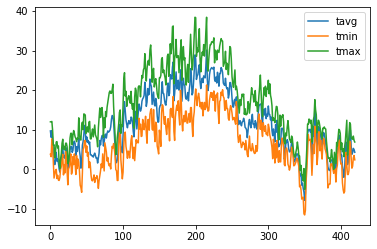

In [174]:
weather.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [175]:
train_data = weather.sample(frac=0.8, random_state=1)
test_data = weather.drop(train_data.index)

In [176]:
X_train = train_data['date'].apply(datetime.timestamp).values.reshape(-1, 1)
y_train = train_data['tavg']
X_test = test_data['date'].apply(datetime.timestamp).values.reshape(-1, 1)
y_test = test_data['tavg']

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [178]:

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 58.092296017804635


In [179]:
import pickle
pickle.dump(model, open('lr_model.pkl','wb'))